In [328]:
#This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases taken from the Kaggle. 
#The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, 
#based on certain diagnostic measurements included in the dataset.
#Loading of Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
#from sklearn.cross_validation import KFold
#from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [329]:
#reading the data file
df=pd.read_csv("c:/users/anany/Desktop/JupyterN/Diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [330]:
#Number of rows and columns in the given dataset
df.shape

(768, 9)

In [331]:
#checking datatypes
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [332]:
#checking for any NUll values
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


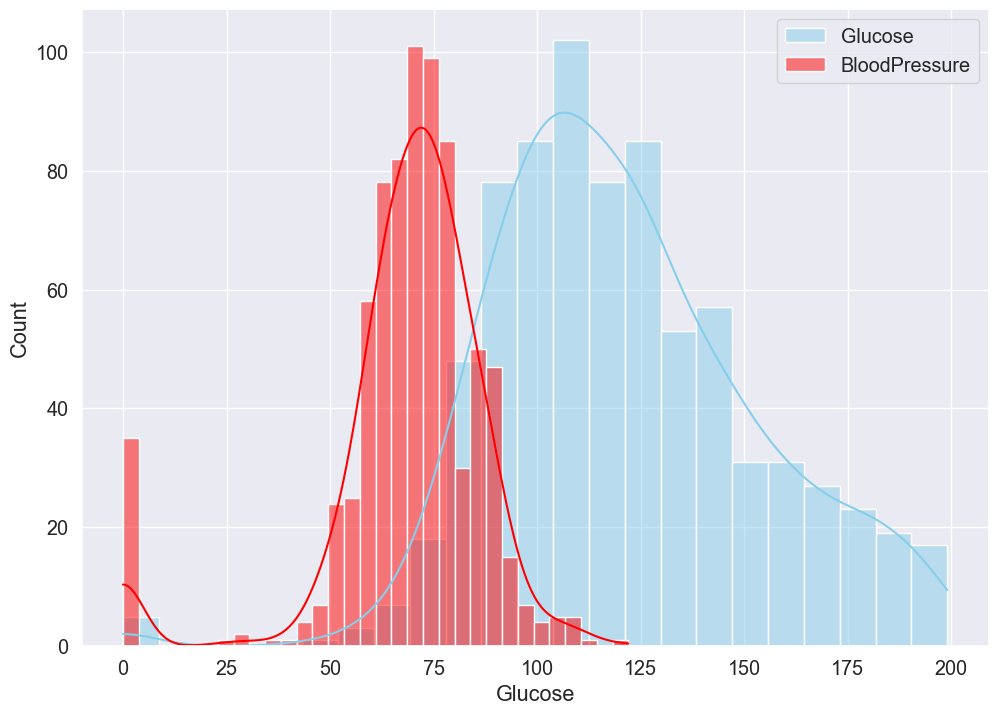

In [333]:
#plotting two or more histogram in the same graph area
sns.histplot(data=df, x="Glucose", color="skyblue", label="Glucose", kde=True)
sns.histplot(data=df, x="BloodPressure", color="red", label="BloodPressure", kde=True)

plt.legend() 
plt.show()

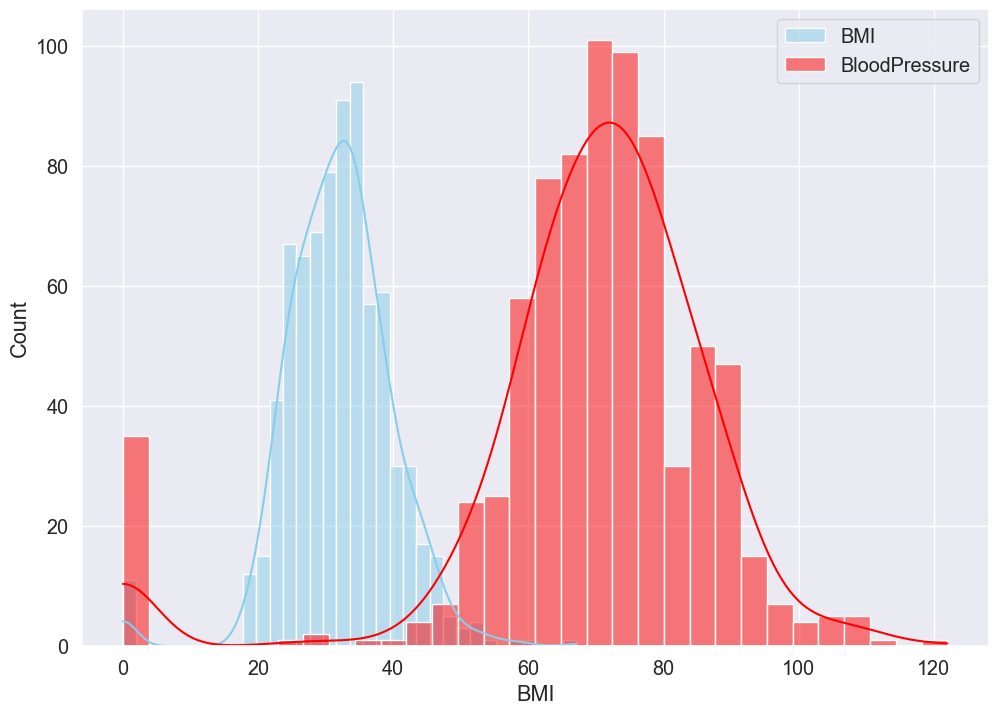

In [334]:
sns.histplot(data=df, x="BMI", color="skyblue", label="BMI", kde=True)
sns.histplot(data=df, x="BloodPressure", color="red", label="BloodPressure", kde=True)

plt.legend() 
plt.show()

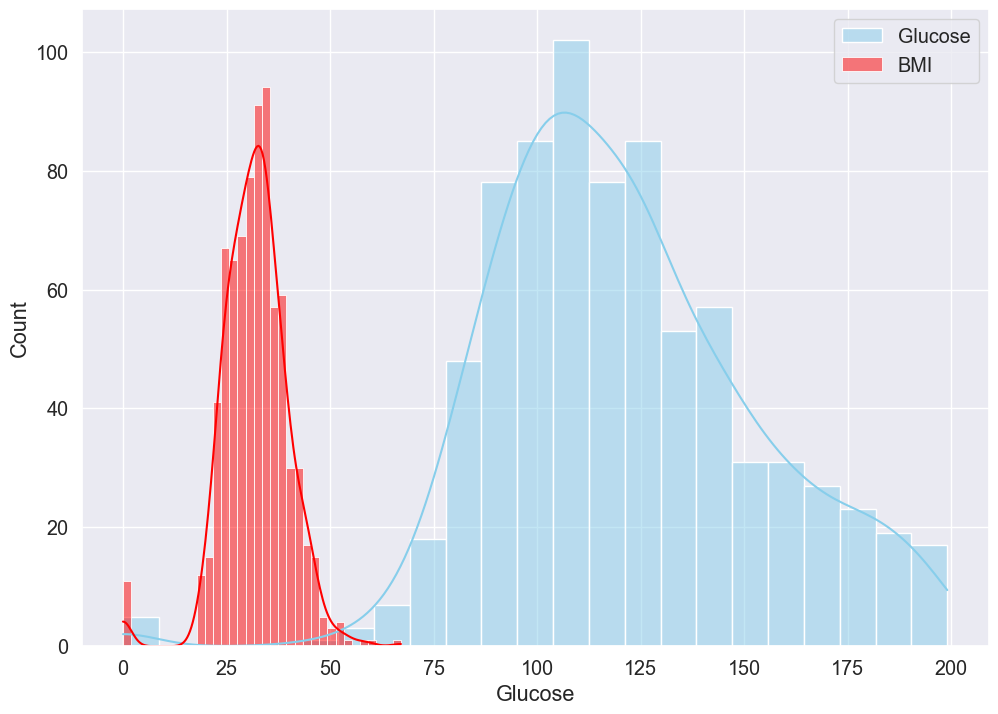

In [335]:
sns.histplot(data=df, x="Glucose", color="skyblue", label="Glucose", kde=True)
sns.histplot(data=df, x="BMI", color="red", label="BMI", kde=True)

plt.legend() 
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


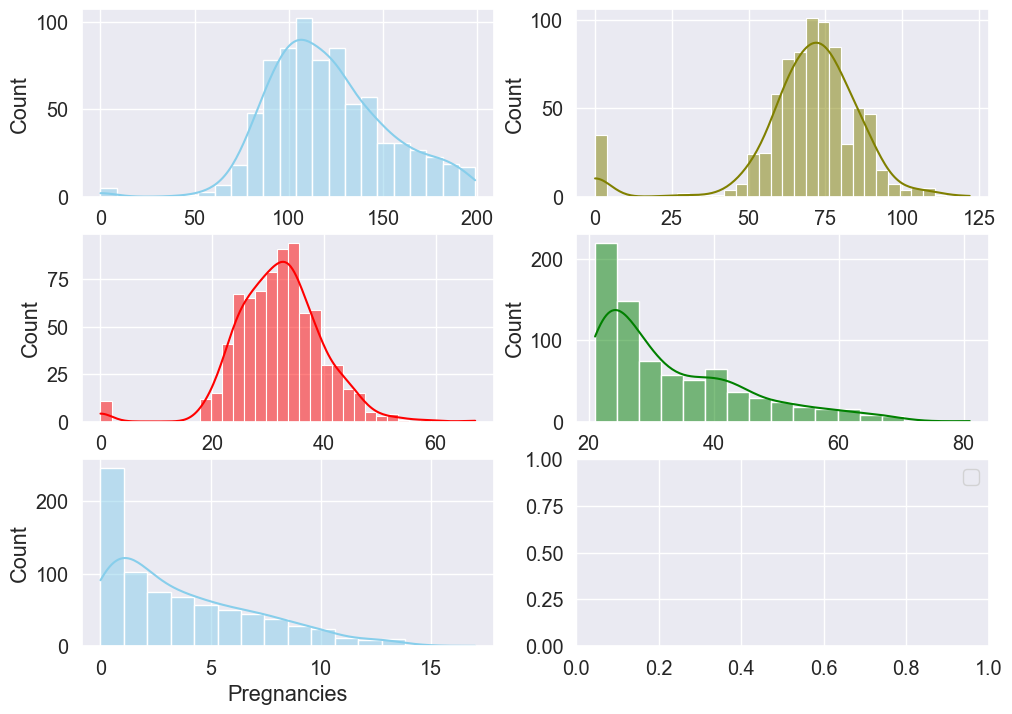

In [336]:
fig,axs=plt.subplots(3,2)
sns.histplot(data=df, x="Glucose", color="skyblue", label="Glucose", kde=True,ax=axs[0,0])
sns.histplot(data=df, x="BloodPressure", color="olive", label="BloodPressure", kde=True,ax=axs[0,1])
sns.histplot(data=df, x="BMI", color="red", label="BMI", kde=True,ax=axs[1,0])
sns.histplot(data=df, x="Age", color="green", label="Age", kde=True,ax=axs[1,1])
sns.histplot(data=df, x="Pregnancies", color="skyblue", label="Pregnancies", kde=True,ax=axs[2,0])
#sns.histplot(data=df, x="Skin Thikness", color="olive", label="SkinThikness", kde=True,ax=axs[2,1])

plt.legend() 
plt.show()

In [337]:
#Dividing the data into two dataframes based on the outcome 0 and 1
dfd=df[df['Outcome']==1]
dfn=df[df['Outcome']==0]

In [338]:
dfn.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [339]:
dfd.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


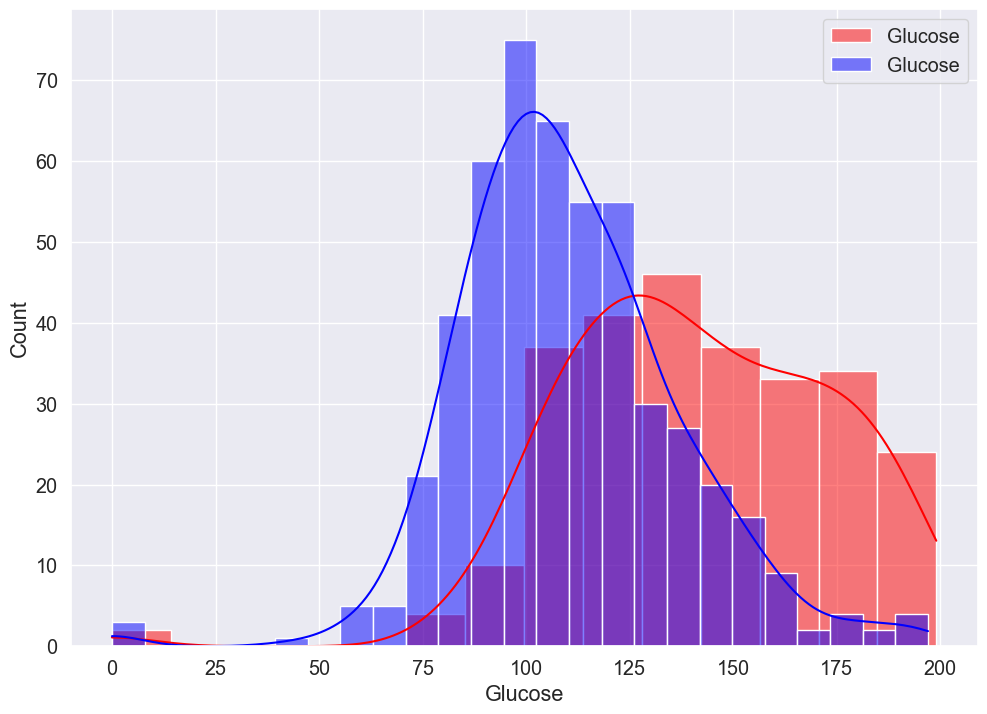

In [340]:
#Checking the amount of glucose in diabetic patient and non-diabetic patient
sns.histplot(data=dfd, x="Glucose", color="red", label="Glucose", kde=True)
sns.histplot(data=dfn, x="Glucose", color="blue", label="Glucose", kde=True)
plt.legend() 
plt.show()

<Axes: xlabel='Insulin', ylabel='Count'>

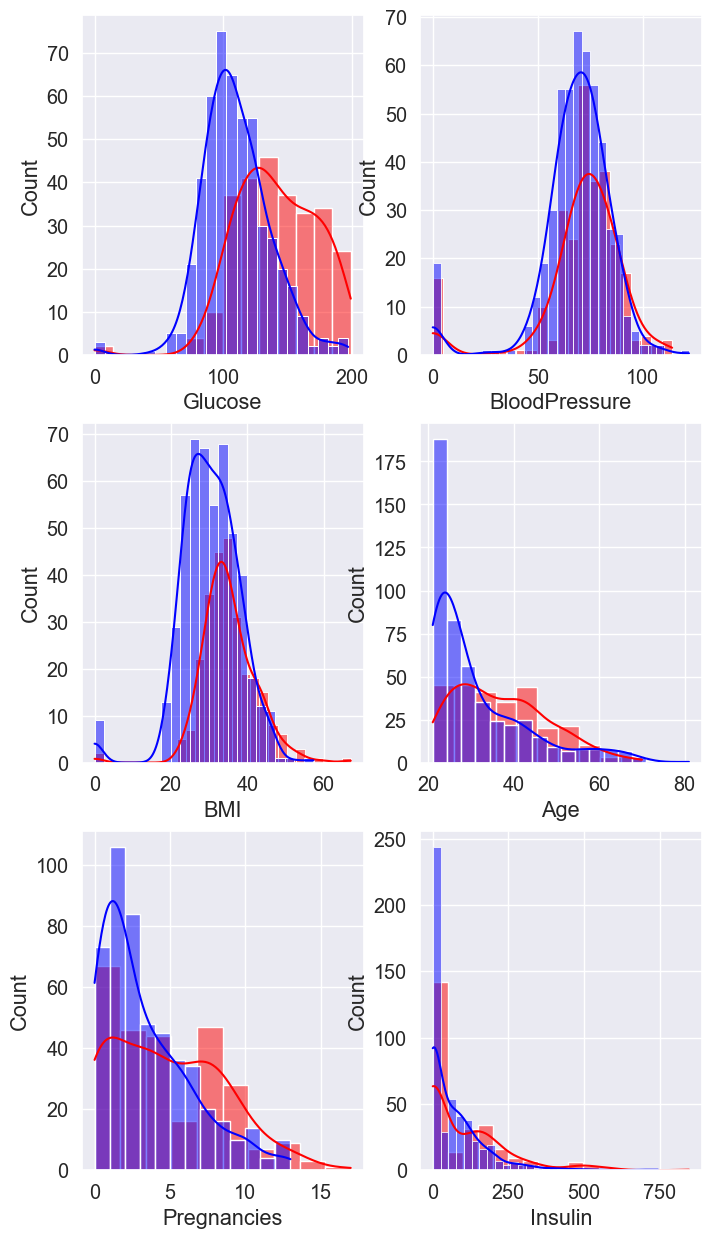

In [341]:
#Showing how all the factors varies in diabetic and non-diabetic patients
fig,axs=plt.subplots(nrows=3,ncols=2,figsize=(8,15))
sns.histplot(data=dfd, x="Glucose", color="red", label="Glucose", kde=True,ax=axs[0,0])
sns.histplot(data=dfd, x="BloodPressure", color="red", label="BloodPressure", kde=True,ax=axs[0,1])
sns.histplot(data=dfd, x="BMI", color="red", label="BMI", kde=True,ax=axs[1,0])
sns.histplot(data=dfd, x="Age", color="red", label="Age", kde=True,ax=axs[1,1])
sns.histplot(data=dfd, x="Pregnancies", color="red", label="Pregnancies", kde=True,ax=axs[2,0])
sns.histplot(data=dfd, x="Insulin", color="red", label="Insulin", kde=True,ax=axs[2,1])
sns.histplot(data=dfn, x="Glucose", color="blue", label="Glucose", kde=True,ax=axs[0,0])
sns.histplot(data=dfn, x="BloodPressure", color="blue", label="BloodPressure", kde=True,ax=axs[0,1])
sns.histplot(data=dfn, x="BMI", color="blue", label="BMI", kde=True,ax=axs[1,0])
sns.histplot(data=dfn, x="Age", color="blue", label="Age", kde=True,ax=axs[1,1])
sns.histplot(data=dfn, x="Pregnancies", color="blue", label="Pregnancies", kde=True,ax=axs[2,0])
sns.histplot(data=dfn, x="Insulin", color="blue", label="Insulin", kde=True,ax=axs[2,1])

<Axes: xlabel='Insulin', ylabel='Count'>

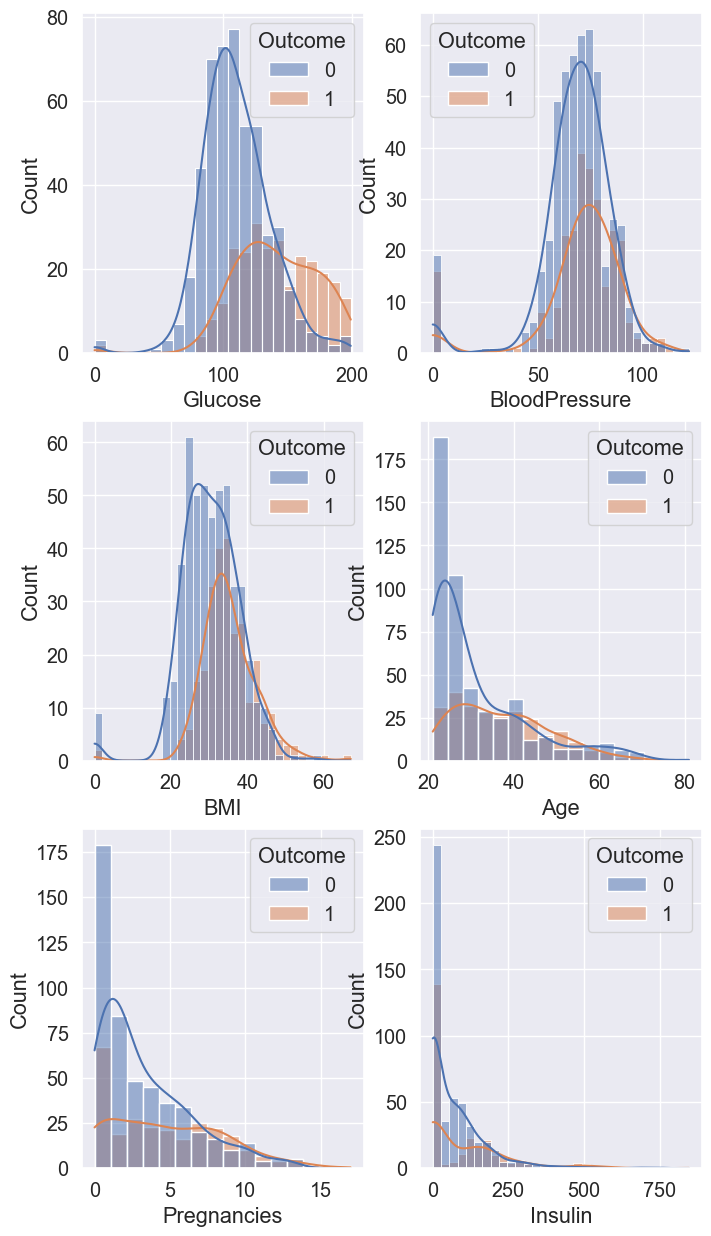

In [342]:
#Plotting the same graph using 'hue'
fig,axs=plt.subplots(nrows=3,ncols=2,figsize=(8,15))
sns.histplot(data=df, x="Glucose", label="Glucose", kde=True,ax=axs[0,0], hue='Outcome')
sns.histplot(data=df, x="BloodPressure", label="BloodPressure", kde=True,ax=axs[0,1],hue='Outcome')
sns.histplot(data=df, x="BMI",label="BMI", kde=True,ax=axs[1,0],hue='Outcome')
sns.histplot(data=df, x="Age",label="Age", kde=True,ax=axs[1,1],hue='Outcome')
sns.histplot(data=df, x="Pregnancies",label="Pregnancies", kde=True,ax=axs[2,0],hue='Outcome')
sns.histplot(data=df, x="Insulin", label="Insulin", kde=True,ax=axs[2,1],hue='Outcome')

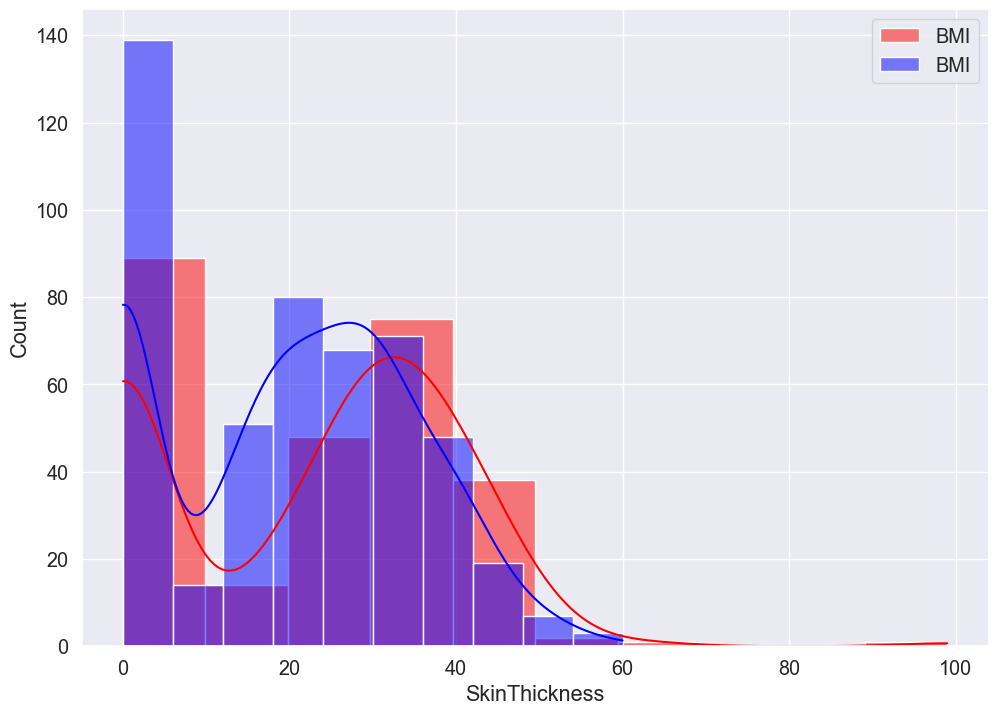

In [343]:
sns.histplot(data=dfd, x="SkinThickness", color="red", label="BMI", kde=True)
sns.histplot(data=dfn, x="SkinThickness", color="blue", label="BMI", kde=True)
plt.legend() 
plt.show()

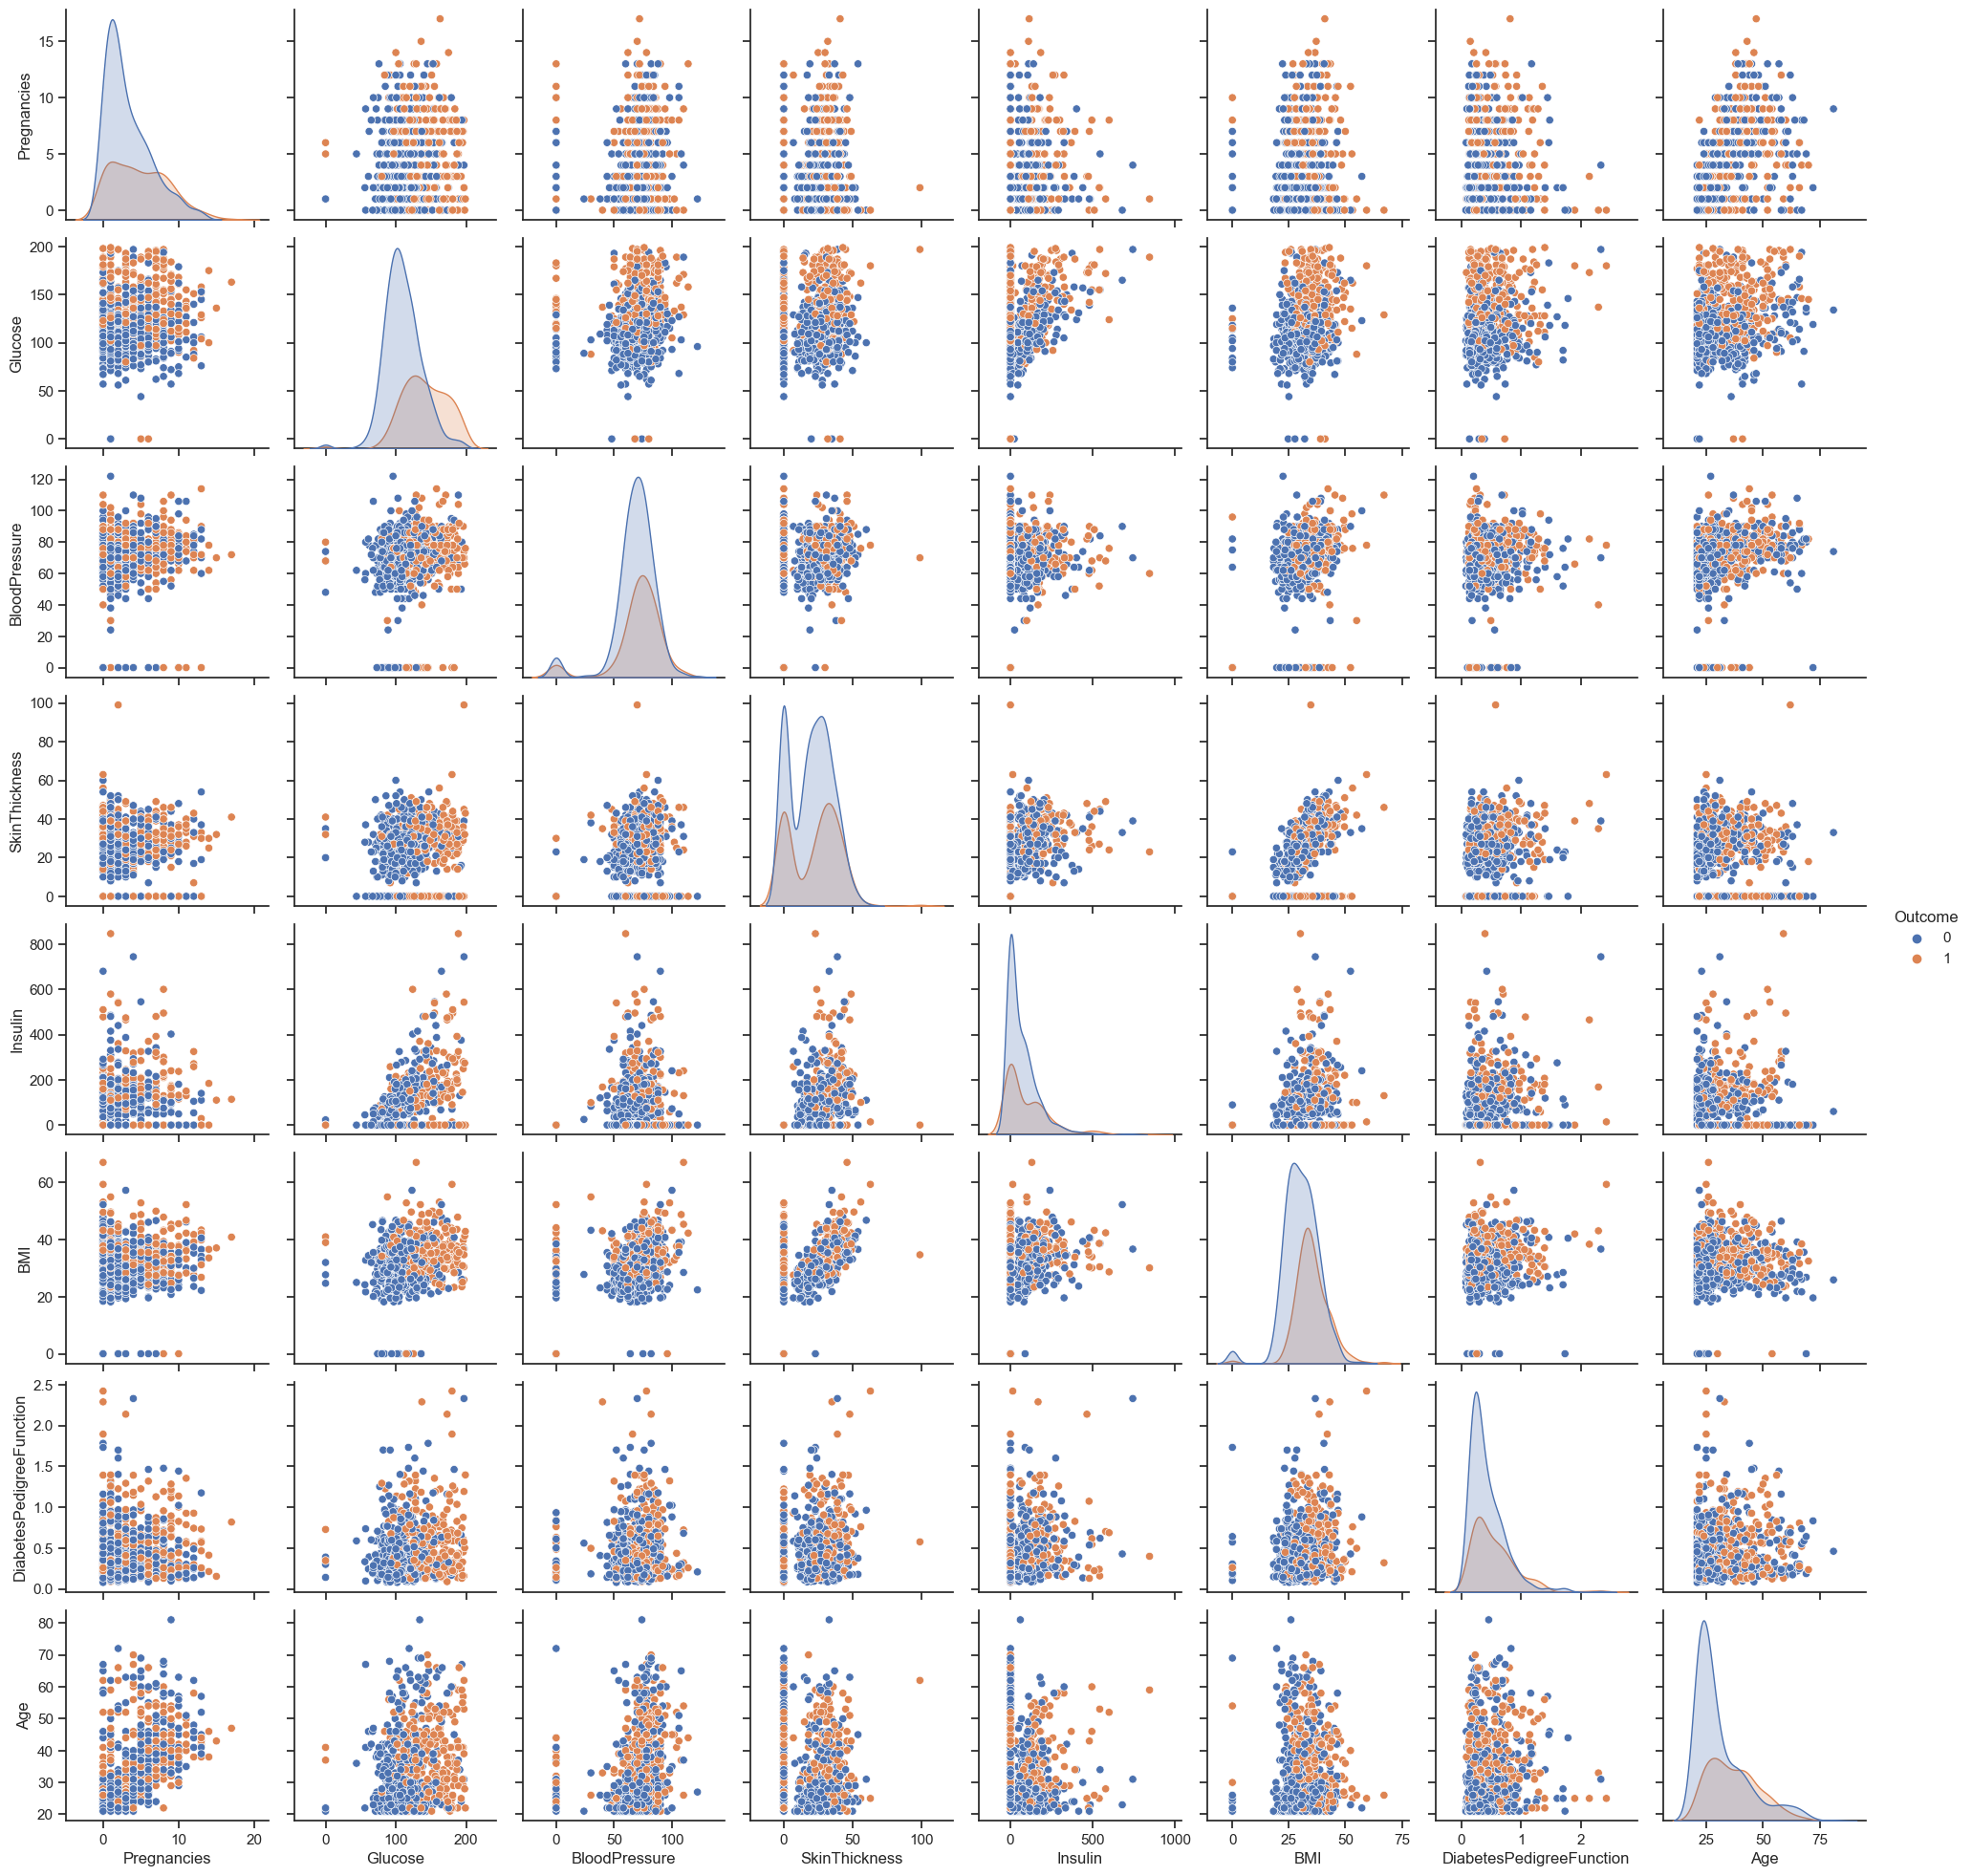

In [344]:
#plotting the scatterplot matrix
sns.set_theme(style="ticks")
sns.pairplot(df, hue='Outcome')

In [345]:
#fitting Linear Regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
x = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           7.36e-55
Time:                        13:29:50   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [346]:
import warnings
warnings.filterwarnings('ignore')
import ipywidgets as widgets
from scipy.linalg import lstsq
import ipywidgets as widgets
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from IPython.display import display, clear_output

# set the random seed
np.random.seed(28)

# set aside 20% of the data for testing
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2)

# set aside %25 of the remaining data for validation
#df_train, df_val = train_test_split(df, train_size=0.75, test_size=0.25)

In [347]:
x_train=df[["Glucose", "Age", "Pregnancies", "Insulin", "DiabetesPedigreeFunction"]]
x_test=df[["Glucose", "Age", "Pregnancies", "Insulin", "DiabetesPedigreeFunction"]]
y_train=df["Outcome"]
y_test=df["Outcome"]

In [348]:
#Linear Regression Model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [349]:
# r square score which is very less
regr.score(x_train,y_train)

0.26011699765335616

In [350]:
#using Multiple Linear Regression Analysis
regr = linear_model.LinearRegression()
regr.fit(x_test, y_test)

LinearRegression()

In [351]:
regr.score(x_train,y_train)

0.26011699765335616

In [352]:
#using Logistic Regression Analysis
regr1=linear_model.LogisticRegression()
regr1.fit(x_train, y_train)

LogisticRegression()

In [353]:
#r2 score which comparatively good
regr1.score(x_train, y_train)

0.7591145833333334

In [354]:
regr1.score(x_test, y_test)

0.7591145833333334

In [355]:
# calculate the least squares solution
lstsq_results = lstsq(x_train, y_train)

beta = lstsq_results[0]

beta

array([ 3.10750769e-03, -4.09301493e-03,  2.51400930e-02,  5.76258565e-05,
        8.36484637e-02])

In [356]:
x_train.loc[0, :]

Glucose                     148.000
Age                          50.000
Pregnancies                   6.000
Insulin                       0.000
DiabetesPedigreeFunction      0.627
Name: 0, dtype: float64

In [357]:
x_train.loc[0, :]@beta

0.4585485373646415

In [358]:
predict_train=x_train@beta
predict_train.head()

0    0.458549
1    0.191755
2    0.695030
3    0.235141
4    0.491728
dtype: float64

In [359]:
df_train["predicted Outcome"]=predict_train
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [360]:
# make predictions for the test data using beta and the dot product
predict_test = x_test @ beta

# create a new column in our test data with predicted total riders
df_test["predicted Outcome"] = predict_test

# show the first 5 rows of test data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [361]:
#Calculating the RMSE(root mean square error)
# get an array of errors
errors = y_train - predict_train
np.average(errors)

-0.031402120701257946

In [362]:
# square the array of errors
sq_error = errors ** 2
# take the average of the squared errors
mean_sq_error = np.average(sq_error)
mean_sq_error
# take the square root of the mean squared errors
root_mean_sq_err = np.sqrt(mean_sq_error)
root_mean_sq_err

0.43353239386377945

In [363]:
# calculate the error for each data point
test_errors = y_test-predict_test

# square the errors
test_sq_error = test_errors**2

# take the mean of the squared errors
test_mean_sq_error = np.average(test_sq_error)

# take the square root of the mean squared errors
test_rmse = np.sqrt(test_mean_sq_error)
test_rmse

0.43353239386377945

In [364]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth =3, random_state = 28)

dtc.fit(x_train, y_train)

predicted = dtc.predict(x_test)

In [365]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predicted, y_test)
accuracy

0.7630208333333334

In [366]:
dtc.score(x_train, y_train)

0.7630208333333334

<Figure size 3000x1000 with 0 Axes>

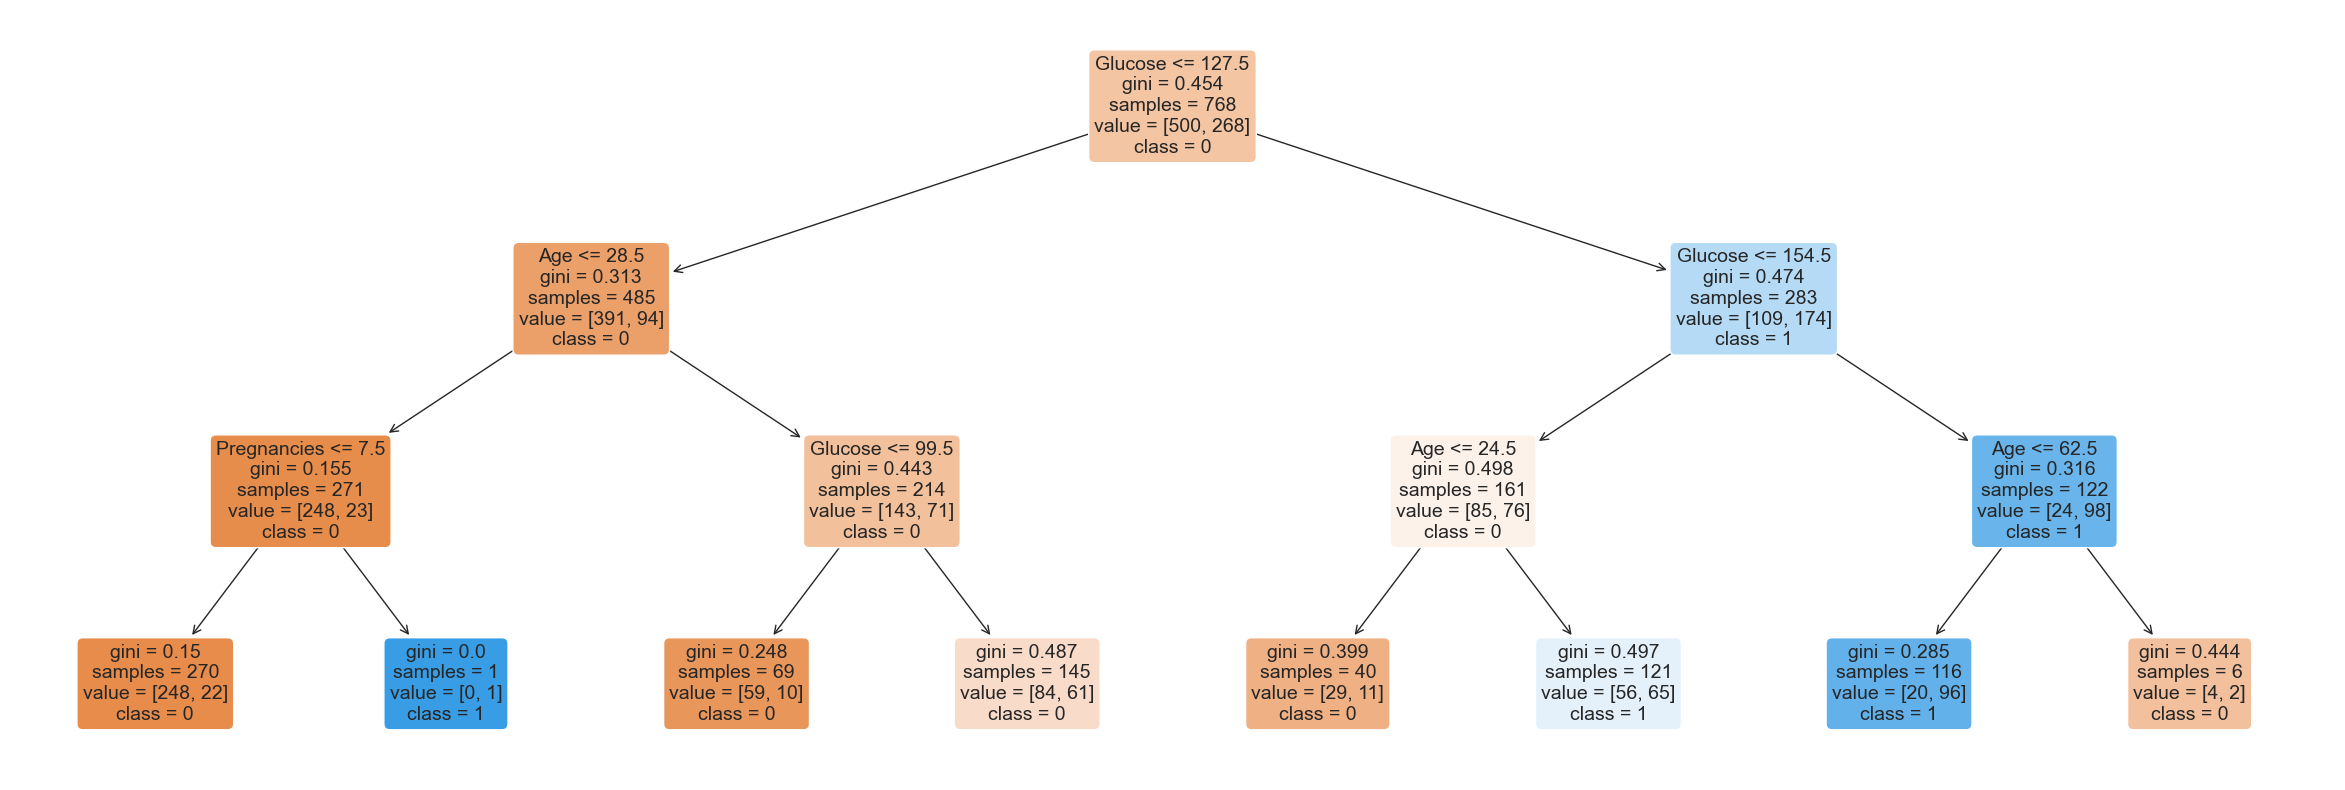

In [367]:
from sklearn import tree

import matplotlib.pyplot as plt

plt.figure(figsize=(30,10), facecolor ='k')

feature_names = ["Glucose", "Age", "Pregnancies", "Insulin", "DiabetesPedigreeFunction"]

labels = ["0","1"]
plt.figure(figsize=(30,10))

a = tree.plot_tree(dtc,

                   feature_names = feature_names,

                   class_names = labels,

                   rounded = True,

                   filled = True,

                   fontsize=14)

plt.show()

In [368]:
test_pred_decision_tree = dtc.predict(x_test)

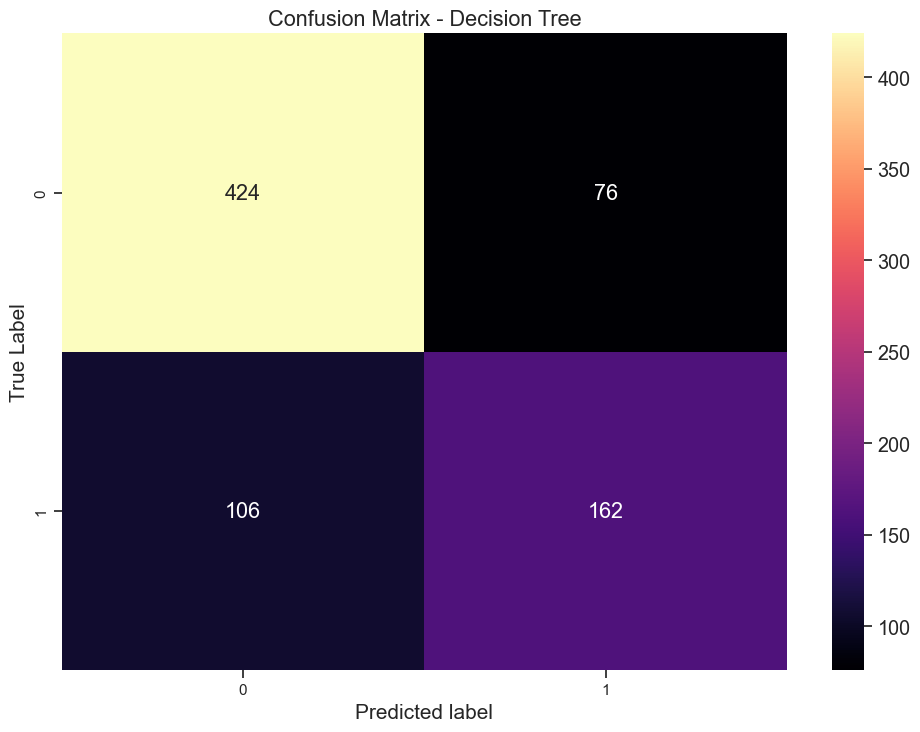

<Figure size 1000x700 with 0 Axes>

In [369]:
#Confusion Matrix for Decision Tree Classifier
from sklearn import metrics

import seaborn as sns

import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test,  

                                            test_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix)

ax = plt.axes()

sns.set(font_scale=1.3)

plt.figure(figsize=(10,7))

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Decision Tree')

ax.set_xlabel("Predicted label", fontsize =15)

#ax.set_xticklabels(['']+labels)

ax.set_ylabel("True Label", fontsize=15)

#ax.set_yticklabels(list(labels), rotation = 0)

plt.show()

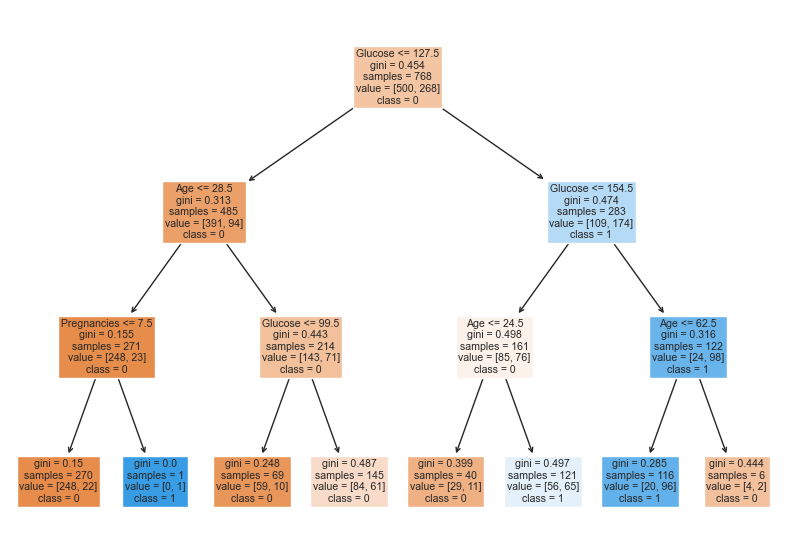

In [370]:
from sklearn import tree
feature_names=["Glucose", "Age", "Pregnancies", "Insulin", "DiabetesPedigreeFunction"]
target=['0','1'] 

fig = plt.figure(figsize = (10, 7))
tree.plot_tree(dtc, feature_names = feature_names,
              class_names = target, filled = True)
plt.show()

In [371]:
from sklearn.neighbors import KNeighborsClassifier

# create the KNeighborsClassifier


# knn = ..

knn = KNeighborsClassifier()

In [372]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [373]:
# use the fitted knn model to predict for the test data
knn_predictions = knn.predict(x_test)

knn_predictions

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [374]:
knn_score = knn.score(x_test, y_test)

# show the score
knn_score

0.8059895833333334

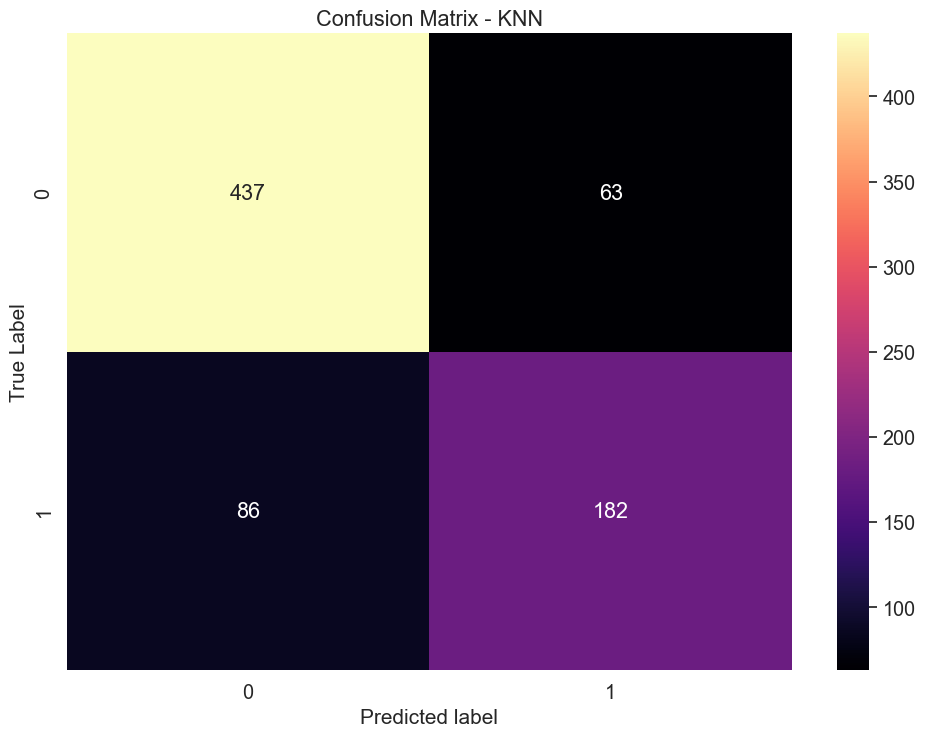

<Figure size 1000x700 with 0 Axes>

In [375]:
#Confusion Matrix for KNeighborsClassifier
from sklearn import metrics

import seaborn as sns

import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test,  

                                            knn_predictions)

matrix_df = pd.DataFrame(confusion_matrix)

ax = plt.axes()

sns.set(font_scale=1.3)

plt.figure(figsize=(10,7))

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - KNN')

ax.set_xlabel("Predicted label", fontsize =15)

#ax.set_xticklabels(['']+labels)

ax.set_ylabel("True Label", fontsize=15)

#ax.set_yticklabels(list(labels), rotation = 0)

plt.show()

In [376]:
from sklearn import svm

svm_model = svm.SVC()

In [377]:
# SVM fit and score
svm_model.fit(x_train, y_train)

svm_model_score = svm_model.score(x_test, y_test)

svm_model_score

0.7513020833333334

In [378]:
# Classifier using Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

In [379]:
# Random Forest fit and score
rf_model.fit(x_train, y_train)
rfpredict=rf_model.predict(x_test)

rf_model_score = rf_model.score(x_train, y_train)

rf_model_score

1.0

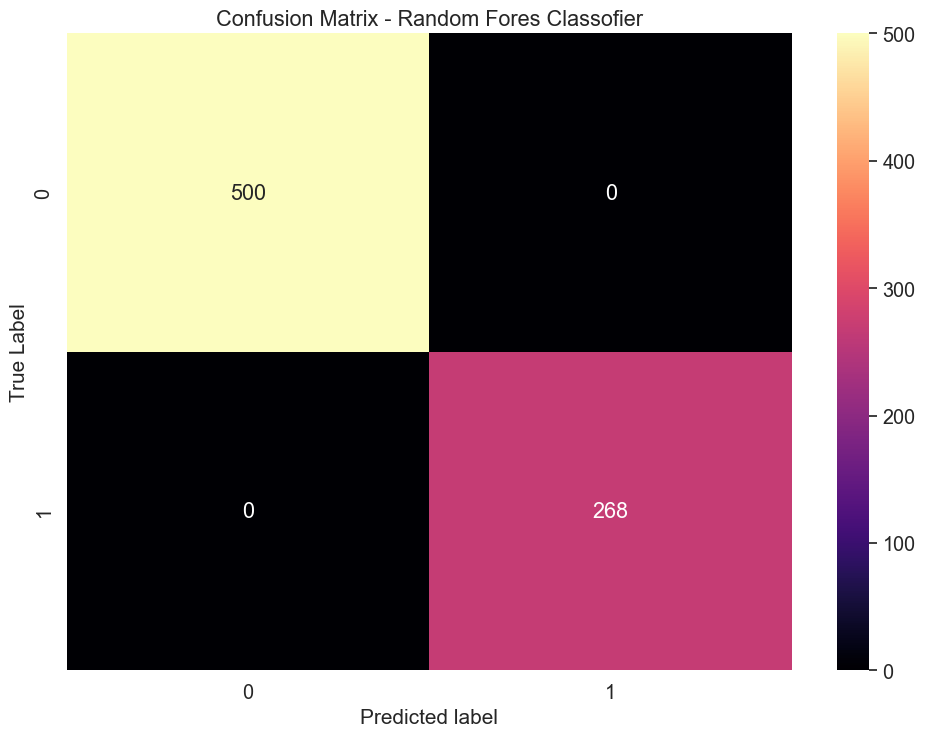

<Figure size 1000x700 with 0 Axes>

In [380]:
#Confusion Matrix for Random Forest Classifier
from sklearn import metrics

import seaborn as sns

import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test,  

                                            rfpredict)

matrix_df = pd.DataFrame(confusion_matrix)

ax = plt.axes()

sns.set(font_scale=1.3)

plt.figure(figsize=(10,7))

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Random Fores Classofier')

ax.set_xlabel("Predicted label", fontsize =15)

#ax.set_xticklabels(['']+labels)

ax.set_ylabel("True Label", fontsize=15)

#ax.set_yticklabels(list(labels), rotation = 0)

plt.show()

In [381]:
#Comparing F1Score from KNN and Random Forest
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

from sklearn.metrics import classification_report

class_names = ['No Diabetes', 'Diabetes']
print(classification_report(y_test, knn_predictions, target_names=class_names))

              precision    recall  f1-score   support

 No Diabetes       0.84      0.87      0.85       500
    Diabetes       0.74      0.68      0.71       268

    accuracy                           0.81       768
   macro avg       0.79      0.78      0.78       768
weighted avg       0.80      0.81      0.80       768



In [382]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

from sklearn.metrics import classification_report

class_names = ['No Diabetes', 'Diabetes']
print(classification_report(y_test, rfpredict, target_names=class_names))

              precision    recall  f1-score   support

 No Diabetes       1.00      1.00      1.00       500
    Diabetes       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768

